<a href="https://colab.research.google.com/github/JagratiTalreja01/Super-Resolution-SRCNN-/blob/main/FSRCNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import cv2
import h5py
import numpy
from PIL import Image
from keras.models import Model
import matplotlib.pyplot as plt
from keras.layers import Conv2D, Input, Conv2DTranspose, Activation

In [10]:
_input = Input(shape=(None, None, 1), name='input')
C1 = Conv2D(56,(5,5),padding='same', activation='relu')(_input)
C2 = Conv2D(12,(1,1),padding='same', activation='relu')(C1)
C3 = Conv2D(12,(3,3),padding='same', activation='relu')(C2)
C4 = Conv2D(12,(3,3),padding='same', activation='relu')(C3)
C5 = Conv2D(12,(3,3),padding='same', activation='relu')(C4)
C6 = Conv2D(12,(3,3),padding='same', activation='relu')(C5)
C7 = Conv2D(56,(1,1), padding='same', activation='relu')(C6)
C8 = Conv2D(12,(5,5),padding='same', activation='relu')(C7)
C9 = Conv2D(56,(3,3),padding='same', activation='relu')(C8)
C10 = Conv2D(56,(1,1),padding='same', activation='relu')(C9)
D1 = Conv2DTranspose(1,(9,9), strides=(2,2),padding='same', activation='relu')(C10)
model = Model(inputs=_input, outputs=D1)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, None, None, 1)]   0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, None, None, 56)    1456      
_________________________________________________________________
conv2d_51 (Conv2D)           (None, None, None, 12)    684       
_________________________________________________________________
conv2d_52 (Conv2D)           (None, None, None, 12)    1308      
_________________________________________________________________
conv2d_53 (Conv2D)           (None, None, None, 12)    1308      
_________________________________________________________________
conv2d_54 (Conv2D)           (None, None, None, 12)    1308      
_________________________________________________________________
conv2d_55 (Conv2D)           (None, None, None, 12)    1308

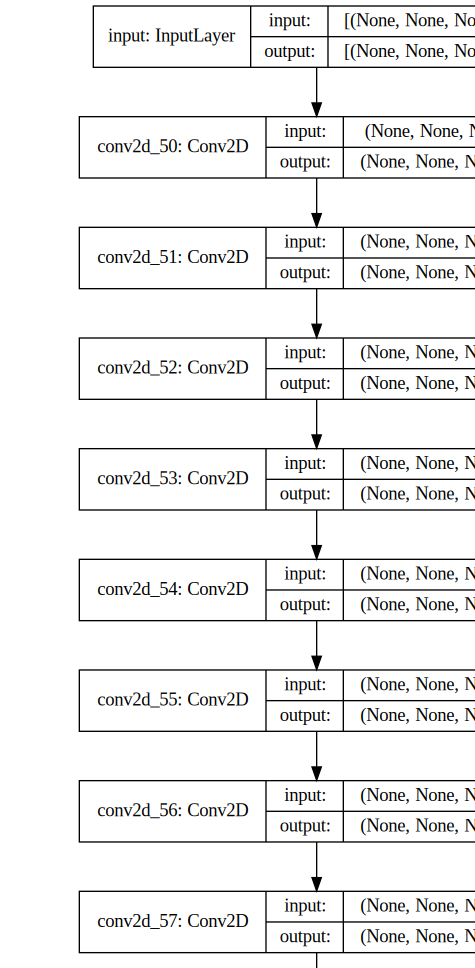

In [12]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))